## Importing basic model

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

## Reading csv file

In [2]:
pd.set_option("display.max_columns",None)
features_df = pd.read_csv("features.csv",index_col=0)
features_df.head(3)

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
respondent_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0,2.0,2.0,1.0,2.0,55 - 64 Years,< 12 Years,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,4.0,4.0,4.0,2.0,4.0,35 - 44 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,1.0,0.0,0.0,NaN,3.0,1.0,1.0,4.0,1.0,2.0,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo


In [3]:
labels_df = pd.read_csv("labels.csv",index_col=0)
labels_df.head(3)

,h1n1_vaccine,seasonal_vaccine
respondent_id,,
0,0,0
1,0,1
2,0,0


## Getting information of dataset

In [4]:
features_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26707 entries, 0 to 26706
Data columns (total 35 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   h1n1_concern                 26615 non-null  float64
 1   h1n1_knowledge               26591 non-null  float64
 2   behavioral_antiviral_meds    26636 non-null  float64
 3   behavioral_avoidance         26499 non-null  float64
 4   behavioral_face_mask         26688 non-null  float64
 5   behavioral_wash_hands        26665 non-null  float64
 6   behavioral_large_gatherings  26620 non-null  float64
 7   behavioral_outside_home      26625 non-null  float64
 8   behavioral_touch_face        26579 non-null  float64
 9   doctor_recc_h1n1             24547 non-null  float64
 10  doctor_recc_seasonal         24547 non-null  float64
 11  chronic_med_condition        25736 non-null  float64
 12  child_under_6_months         25887 non-null  float64
 13  health_worker   

In [5]:
labels_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26707 entries, 0 to 26706
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   h1n1_vaccine      26707 non-null  int64
 1   seasonal_vaccine  26707 non-null  int64
dtypes: int64(2)
memory usage: 625.9 KB


## Getting description of dataset

In [6]:
features_df.describe()

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,household_adults,household_children
count,26615.000000,26591.000000,26636.000000,26499.000000,26688.000000,26665.000000,26620.00000,26625.000000,26579.000000,24547.000000,24547.000000,25736.000000,25887.000000,25903.000000,14433.00000,26316.000000,26319.000000,26312.000000,26245.000000,26193.000000,26170.000000,26458.000000,26458.000000
mean,1.618486,1.262532,0.048844,0.725612,0.068982,0.825614,0.35864,0.337315,0.677264,0.220312,0.329735,0.283261,0.082590,0.111918,0.87972,3.850623,2.342566,2.357670,4.025986,2.719162,2.118112,0.886499,0.534583
std,0.910311,0.618149,0.215545,0.446214,0.253429,0.379448,0.47961,0.472802,0.467531,0.414466,0.470126,0.450591,0.275266,0.315271,0.32530,1.007436,1.285539,1.362766,1.086565,1.385055,1.332950,0.753422,0.928173
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000,3.000000,1.000000,1.000000,4.000000,2.000000,1.000000,0.000000,0.000000
50%,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.00000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000,4.000000,2.000000,2.000000,4.000000,2.000000,2.000000,1.000000,0.000000
75%,2.000000,2.000000,0.000000,1.000000,0.000000,1.000000,1.00000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.00000,5.000000,4.000000,4.000000,5.000000,4.000000,4.000000,1.000000,1.000000
max,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,3.000000,3.000000


In [7]:
labels_df.describe()

,h1n1_vaccine,seasonal_vaccine
count,26707.000000,26707.000000
mean,0.212454,0.465608
std,0.409052,0.498825
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.000000,1.000000
max,1.000000,1.000000


## Checking duplicate value in dataset

In [8]:
features_df.duplicated().sum()

0

## Checking the nan value

In [9]:
features_df.isna().sum()

h1n1_concern                      92
h1n1_knowledge                   116
behavioral_antiviral_meds         71
behavioral_avoidance             208
behavioral_face_mask              19
behavioral_wash_hands             42
behavioral_large_gatherings       87
behavioral_outside_home           82
behavioral_touch_face            128
doctor_recc_h1n1                2160
doctor_recc_seasonal            2160
chronic_med_condition            971
child_under_6_months             820
health_worker                    804
health_insurance               12274
opinion_h1n1_vacc_effective      391
opinion_h1n1_risk                388
opinion_h1n1_sick_from_vacc      395
opinion_seas_vacc_effective      462
opinion_seas_risk                514
opinion_seas_sick_from_vacc      537
age_group                          0
education                       1407
race                               0
sex                                0
income_poverty                  4423
marital_status                  1408
r

In [10]:
labels_df.isna().sum()

h1n1_vaccine        0
seasonal_vaccine    0
dtype: int64

## Checking the nan value in percentage

In [11]:
features_df.isna().sum()/features_df.shape[0] * 100

h1n1_concern                    0.344479
h1n1_knowledge                  0.434343
behavioral_antiviral_meds       0.265848
behavioral_avoidance            0.778822
behavioral_face_mask            0.071142
behavioral_wash_hands           0.157262
behavioral_large_gatherings     0.325757
behavioral_outside_home         0.307036
behavioral_touch_face           0.479275
doctor_recc_h1n1                8.087767
doctor_recc_seasonal            8.087767
chronic_med_condition           3.635751
child_under_6_months            3.070356
health_worker                   3.010447
health_insurance               45.957989
opinion_h1n1_vacc_effective     1.464036
opinion_h1n1_risk               1.452803
opinion_h1n1_sick_from_vacc     1.479013
opinion_seas_vacc_effective     1.729884
opinion_seas_risk               1.924589
opinion_seas_sick_from_vacc     2.010709
age_group                       0.000000
education                       5.268282
race                            0.000000
sex             

## Getting the numerical dtype value columns from dataset

In [12]:
num_data = features_df.select_dtypes(exclude="object")
num_data

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,household_adults,household_children
respondent_id,,,,,,,,,,,,,,,,,,,,,,,
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0,2.0,2.0,1.0,2.0,0.0,0.0
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,4.0,4.0,4.0,2.0,4.0,0.0,0.0
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,1.0,0.0,0.0,NaN,3.0,1.0,1.0,4.0,1.0,2.0,2.0,0.0
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,NaN,3.0,3.0,5.0,5.0,4.0,1.0,0.0,0.0
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,3.0,3.0,2.0,3.0,1.0,4.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,3.0,1.0,1.0,5.0,2.0,2.0,0.0,0.0
26703,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,4.0,2.0,2.0,5.0,1.0,1.0,1.0,0.0
26704,2.0,2.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,4.0,4.0,2.0,5.0,4.0,2.0,0.0,0.0


## Countplot for numerical dtype data


                                             Statistical Analysis of Numerical type data                                              



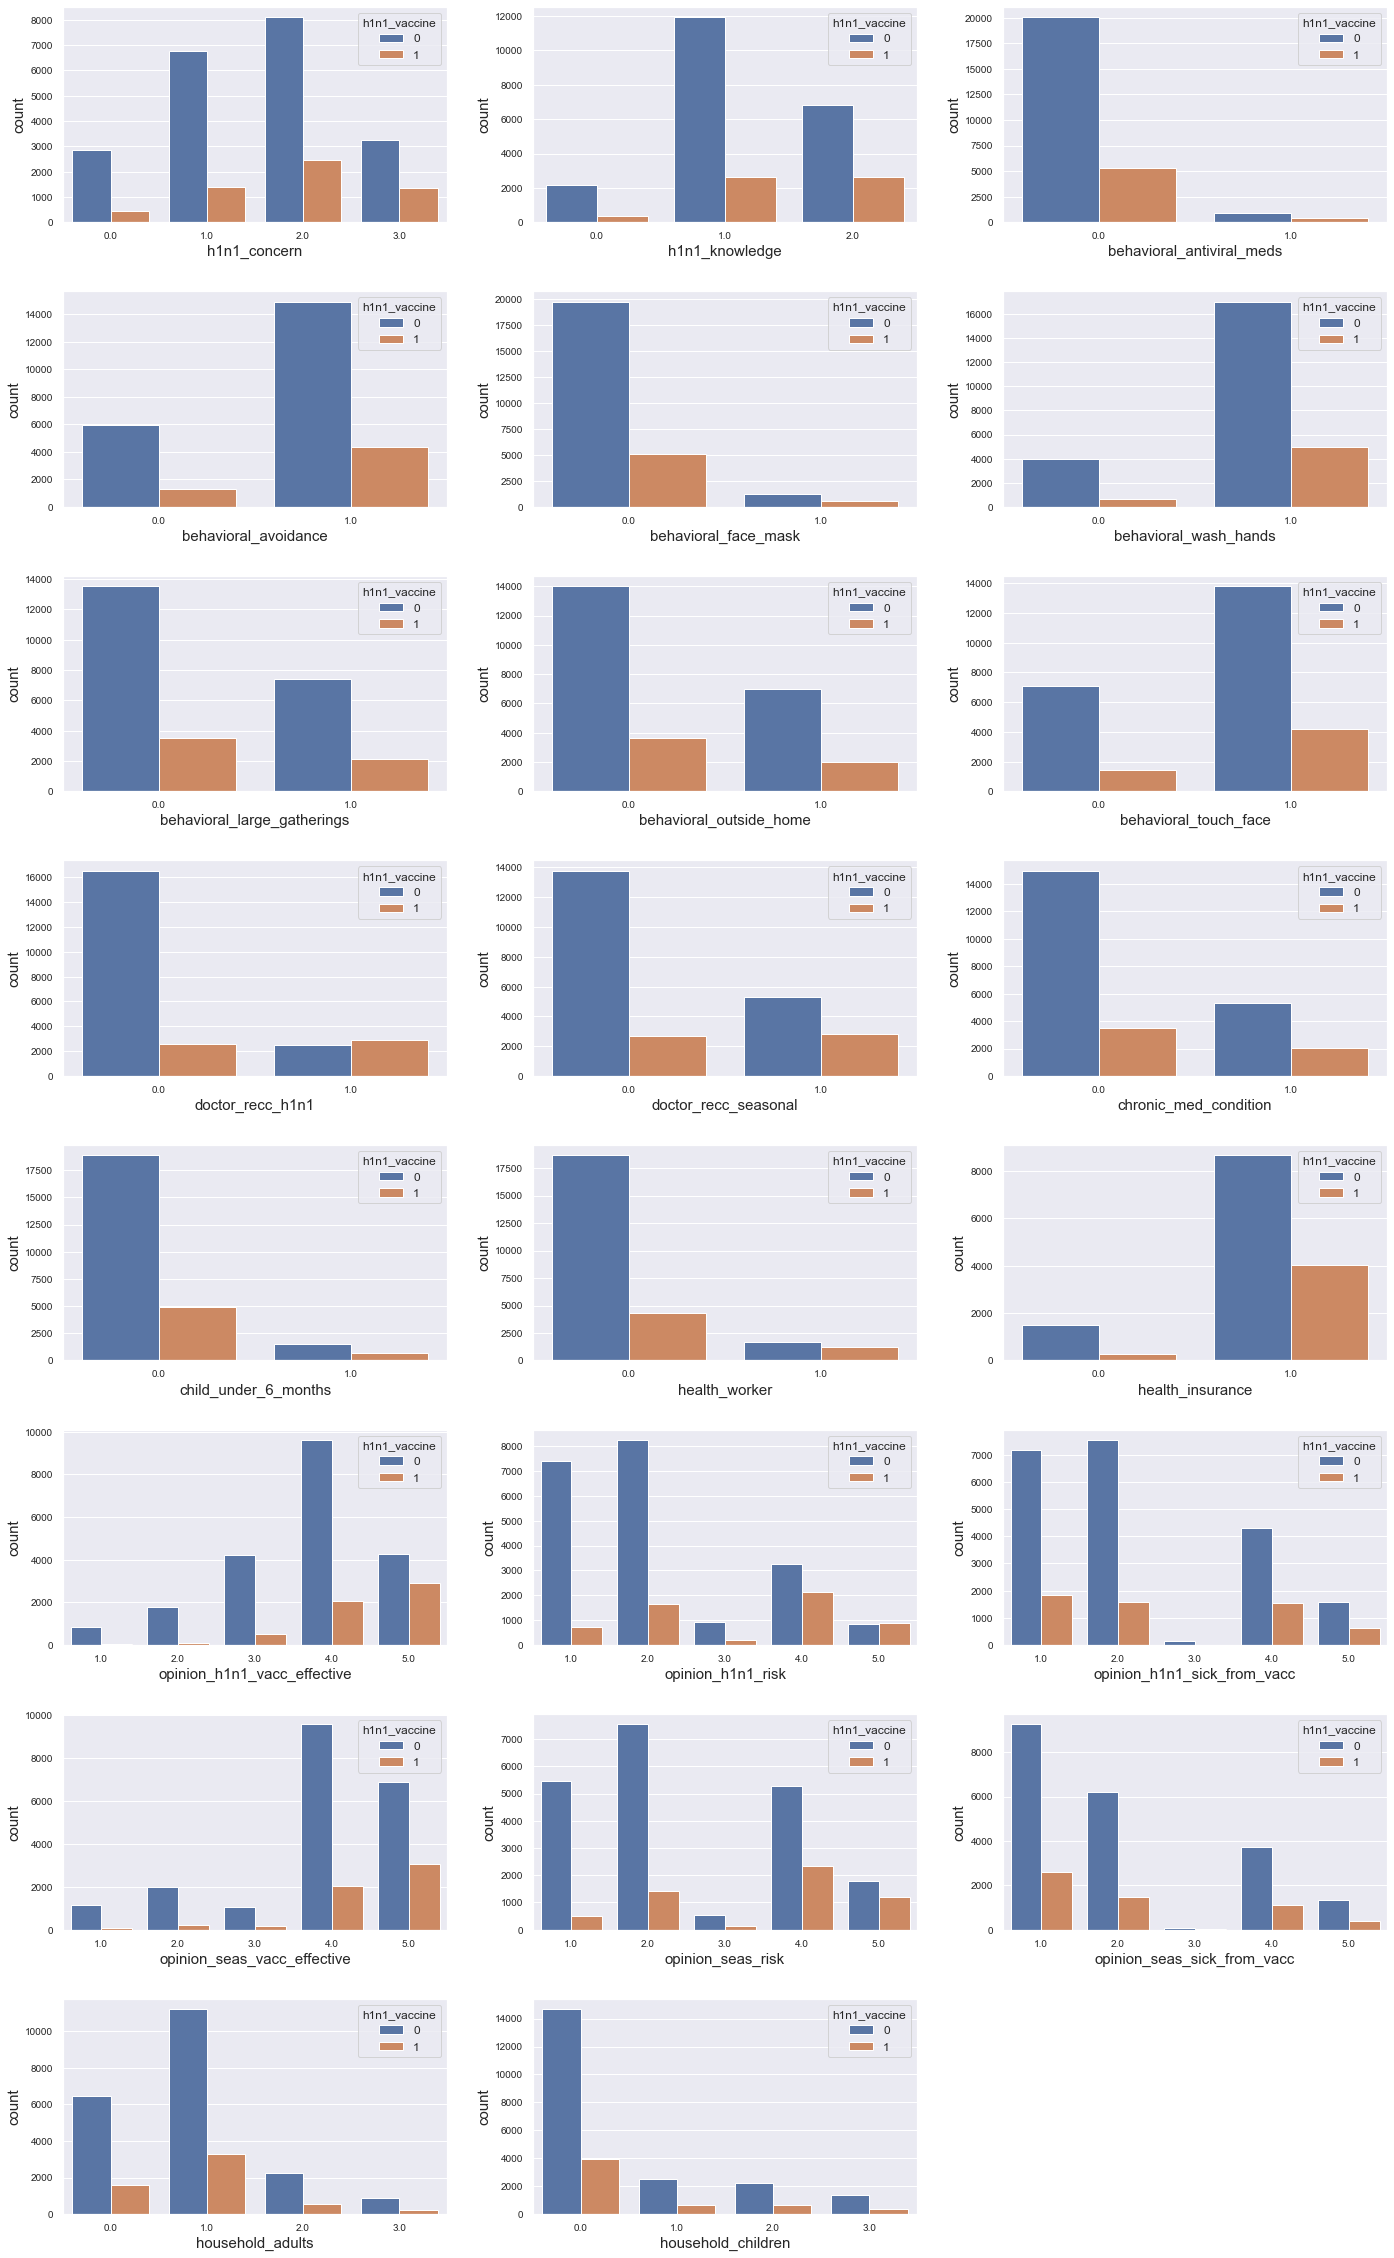

In [13]:
sns.set(rc={"font.size":15,"axes.titlesize":20,"axes.labelsize":15,"xtick.labelsize":10,"ytick.labelsize":10,
            "legend.fontsize":12})
plt.figure(figsize=(20,32))

txt = "Statistical Analysis of Numerical type data"
x = txt.center(134)
print(f"\033[1m\n{x}\n")

for index,cols in enumerate(num_data):
    plt.subplot(8,3,index+1)
    sns.countplot(num_data.loc[:,cols],hue=labels_df["h1n1_vaccine"])
plt.tight_layout(pad=2)

## Getting the object dtype value columns from dataset

In [14]:
obj_data = features_df.select_dtypes(include="object")
obj_data

,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,employment_industry,employment_occupation
respondent_id,,,,,,,,,,,,
0,55 - 64 Years,< 12 Years,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,NaN,NaN
1,35 - 44 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",pxcmvdjn,xgwztkwe
2,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",rucpziij,xtkaffoo
3,65+ Years,12 Years,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",NaN,NaN
4,45 - 54 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",wxleyezf,emcorrxb
...,...,...,...,...,...,...,...,...,...,...,...,...
26702,65+ Years,Some College,White,Female,"<= $75,000, Above Poverty",Not Married,Own,Not in Labor Force,qufhixun,Non-MSA,NaN,NaN
26703,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Rent,Employed,lzgpxyit,"MSA, Principle City",fcxhlnwr,cmhcxjea
26704,55 - 64 Years,Some College,White,Female,NaN,Not Married,Own,NaN,lzgpxyit,"MSA, Not Principle City",NaN,NaN


## Countplot for object dtype data


                                         Statistical Analysis of Categorical type data                                          



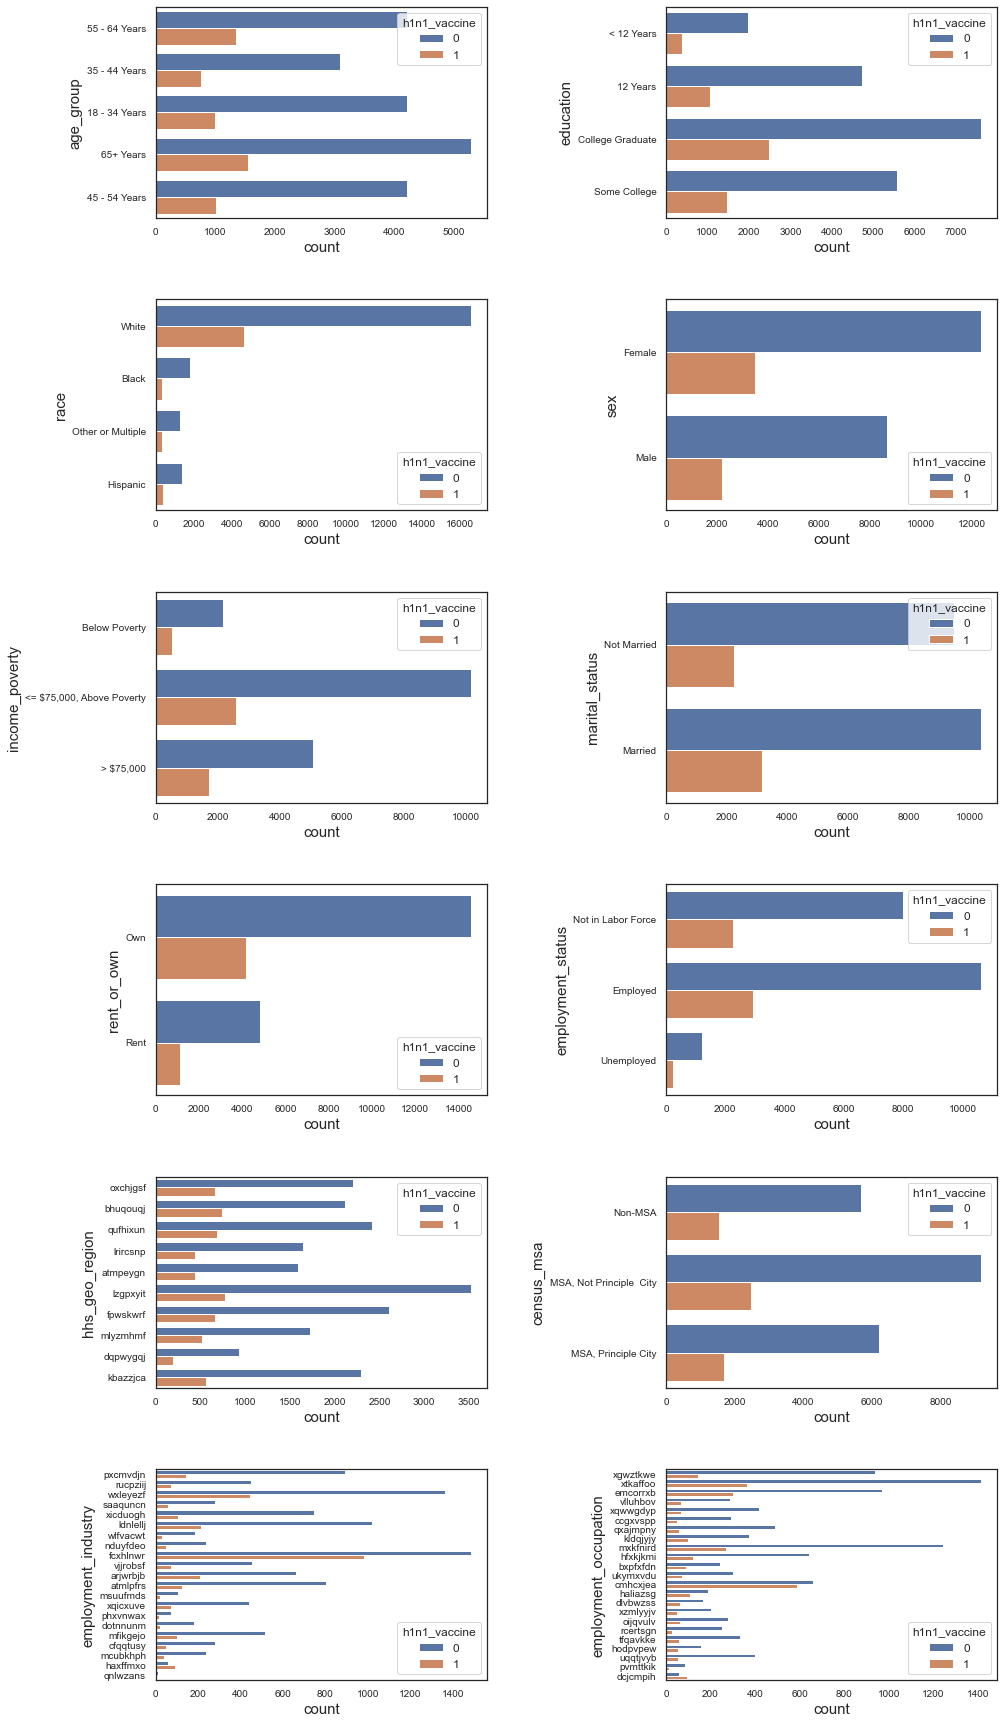

In [15]:
fig = plt.figure(figsize=(15,25))

txt = "Statistical Analysis of Categorical type data"
x = txt.center(128)
print(f"\033[1m\n{x}\n")
sns.set_style("white")
for index in range(len(obj_data.columns)):
    plt.subplot(6,2,index+1)
    sns.countplot( y =obj_data.iloc[:,index],hue=labels_df["h1n1_vaccine"])
fig.tight_layout(pad=3)

## Checking nan value percentage in numerical type data

In [16]:
num_data.isna().sum()/num_data.shape[0] * 100

h1n1_concern                    0.344479
h1n1_knowledge                  0.434343
behavioral_antiviral_meds       0.265848
behavioral_avoidance            0.778822
behavioral_face_mask            0.071142
behavioral_wash_hands           0.157262
behavioral_large_gatherings     0.325757
behavioral_outside_home         0.307036
behavioral_touch_face           0.479275
doctor_recc_h1n1                8.087767
doctor_recc_seasonal            8.087767
chronic_med_condition           3.635751
child_under_6_months            3.070356
health_worker                   3.010447
health_insurance               45.957989
opinion_h1n1_vacc_effective     1.464036
opinion_h1n1_risk               1.452803
opinion_h1n1_sick_from_vacc     1.479013
opinion_seas_vacc_effective     1.729884
opinion_seas_risk               1.924589
opinion_seas_sick_from_vacc     2.010709
household_adults                0.932340
household_children              0.932340
dtype: float64

As health_insurance columns have 45.95% missing data. So we can drop it

## Checking nan value percentage in object type data

In [17]:
obj_data.isna().sum()/obj_data.shape[0] * 100

age_group                 0.000000
education                 5.268282
race                      0.000000
sex                       0.000000
income_poverty           16.561201
marital_status            5.272026
rent_or_own               7.645936
employment_status         5.477965
hhs_geo_region            0.000000
census_msa                0.000000
employment_industry      49.912008
employment_occupation    50.436215
dtype: float64

As employmennt_industry & employemnt_occupation columns consists of 50% missing data. So we can drop it.
While income_proverty have 16% missing data so we can fill it.

## Drop the column 

In [18]:
num_data = num_data.drop(["health_insurance"],axis=1)

In [19]:
obj_data = obj_data.drop(["employment_industry","employment_occupation"],axis=1)

## Fill the nan value by using median as data is ordinal

In [20]:
num_data = num_data.fillna(num_data.median())

## After filling nan value , checking any nan value is present or not

In [21]:
num_data.isna().sum()

h1n1_concern                   0
h1n1_knowledge                 0
behavioral_antiviral_meds      0
behavioral_avoidance           0
behavioral_face_mask           0
behavioral_wash_hands          0
behavioral_large_gatherings    0
behavioral_outside_home        0
behavioral_touch_face          0
doctor_recc_h1n1               0
doctor_recc_seasonal           0
chronic_med_condition          0
child_under_6_months           0
health_worker                  0
opinion_h1n1_vacc_effective    0
opinion_h1n1_risk              0
opinion_h1n1_sick_from_vacc    0
opinion_seas_vacc_effective    0
opinion_seas_risk              0
opinion_seas_sick_from_vacc    0
household_adults               0
household_children             0
dtype: int64

## Filling nan value in object type data is slightly different by using mode

## By using SimpleImputer, we can fill object type data using mode

In [22]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan,strategy='most_frequent')
obj_data.iloc[:,:] = imputer.fit_transform(obj_data)

## After filling nan value , checking any nan value is present or not

In [23]:
obj_data.isna().sum()

age_group            0
education            0
race                 0
sex                  0
income_poverty       0
marital_status       0
rent_or_own          0
employment_status    0
hhs_geo_region       0
census_msa           0
dtype: int64

## Joining numerical type data & object type data into one data frame

In [24]:
final_df = pd.concat([num_data,obj_data],axis=1)
final_df

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,household_adults,household_children,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa
respondent_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,2.0,2.0,1.0,2.0,0.0,0.0,55 - 64 Years,< 12 Years,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,5.0,4.0,4.0,4.0,2.0,4.0,0.0,0.0,35 - 44 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City"
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,1.0,1.0,4.0,1.0,2.0,2.0,0.0,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City"
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,3.0,3.0,5.0,5.0,4.0,1.0,0.0,0.0,65+ Years,12 Years,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City"
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3.0,3.0,2.0,3.0,1.0,4.0,1.0,0.0,45 - 54 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,1.0,5.0,2.0,2.0,0.0,0.0,65+ Years,Some College,White,Female,"<= $75,000, Above Poverty",Not Married,Own,Not in Labor Force,qufhixun,Non-MSA
26703,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,4.0,2.0,2.0,5.0,1.0,1.0,1.0,0.0,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Rent,Employed,lzgpxyit,"MSA, Principle City"
26704,2.0,2.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,4.0,4.0,2.0,5.0,4.0,2.0,0.0,0.0,55 - 64 Years,Some College,White,Female,"<= $75,000, Above Poverty",Not Married,Own,Employed,lzgpxyit,"MSA, Not Principle City"


### As object type data is not understand for the Ml Algorithm, so we have to encode object type data

In [32]:
final_df.select_dtypes(include="object").columns

Index(['age_group', 'education', 'race', 'sex', 'income_poverty',
       'marital_status', 'rent_or_own', 'employment_status', 'hhs_geo_region',
       'census_msa'],
      dtype='object')

In [33]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
final_df[['age_group', 'education', 'race', 'sex', 'income_poverty',
       'marital_status', 'rent_or_own', 'employment_status', 'hhs_geo_region',
       'census_msa']] = final_df[['age_group', 'education', 'race', 'sex', 'income_poverty',
       'marital_status', 'rent_or_own', 'employment_status', 'hhs_geo_region',
       'census_msa']].apply(label.fit_transform)

## After encoding, dataset looklike :

In [34]:
final_df

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,household_adults,household_children,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa
respondent_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,1.0,0.0,0,0,0,0,0,1,1,0.0,0.0,0.0,0.0,0.0,3,1,2,2,1,2,0.0,0.0,3,1,3,0,2,1,0,1,8,2
1,3.0,2.0,0,1,0,1,0,1,1,0.0,0.0,0.0,0.0,0.0,5,4,4,4,2,4,0.0,0.0,1,0,3,1,2,1,1,0,1,0
2,1.0,1.0,0,1,0,0,0,0,0,0.0,0.0,1.0,0.0,0.0,3,1,1,4,1,2,2.0,0.0,0,2,3,1,0,1,0,0,9,0
3,1.0,1.0,0,1,0,1,1,0,0,0.0,1.0,1.0,0.0,0.0,3,3,5,5,4,1,0.0,0.0,4,0,3,0,2,1,1,1,5,1
4,2.0,1.0,0,1,0,1,1,0,1,0.0,0.0,0.0,0.0,0.0,3,3,2,3,1,4,1.0,0.0,2,3,3,0,0,0,0,0,9,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,2.0,0.0,0,1,0,0,0,1,0,0.0,0.0,0.0,0.0,0.0,3,1,1,5,2,2,0.0,0.0,4,3,3,0,0,1,0,1,9,2
26703,1.0,2.0,0,1,0,1,0,0,0,1.0,1.0,0.0,0.0,1.0,4,2,2,5,1,1,1.0,0.0,0,2,3,1,0,1,1,0,6,1
26704,2.0,2.0,0,1,1,1,1,0,1,0.0,0.0,0.0,0.0,0.0,4,4,2,5,4,2,0.0,0.0,3,3,3,0,0,1,0,0,6,0


## Checking Imbalance dataset

In [35]:
labels_df.iloc[:,0].value_counts(normalize=True)*100

0    78.754634
1    21.245366
Name: h1n1_vaccine, dtype: float64

In [37]:
final_df.columns

Index(['h1n1_concern', 'h1n1_knowledge', 'behavioral_antiviral_meds',
       'behavioral_avoidance', 'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_h1n1', 'doctor_recc_seasonal',
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk',
       'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'household_adults',
       'household_children', 'age_group', 'education', 'race', 'sex',
       'income_poverty', 'marital_status', 'rent_or_own', 'employment_status',
       'hhs_geo_region', 'census_msa'],
      dtype='object')

Our ML Algorithm more learn about 0 outcome compare to 1 outcome. It will lead biasing problem. So we have require balance dataset

## Converting Imbalance dataset into balance dataset 

In [38]:
from imblearn.over_sampling import RandomOverSampler,SMOTENC,SMOTE
oversampling = RandomOverSampler()
final_df_over , labels_df_over = oversampling.fit_sample(final_df,labels_df.iloc[:,1])
final_df_over = pd.DataFrame(final_df_over)
final_df_over.columns = ['h1n1_concern', 'h1n1_knowledge', 'behavioral_antiviral_meds',
       'behavioral_avoidance', 'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_h1n1', 'doctor_recc_seasonal',
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk',
       'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'household_adults',
       'household_children', 'age_group', 'education', 'race', 'sex',
       'income_poverty', 'marital_status', 'rent_or_own', 'employment_status',
       'hhs_geo_region', 'census_msa']
final_df_over

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,household_adults,household_children,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa
0,1.0,0.0,0,0,0,0,0,1,1,0.0,0.0,0.0,0.0,0.0,3,1,2,2,1,2,0.0,0.0,3,1,3,0,2,1,0,1,8,2
1,3.0,2.0,0,1,0,1,0,1,1,0.0,0.0,0.0,0.0,0.0,5,4,4,4,2,4,0.0,0.0,1,0,3,1,2,1,1,0,1,0
2,1.0,1.0,0,1,0,0,0,0,0,0.0,0.0,1.0,0.0,0.0,3,1,1,4,1,2,2.0,0.0,0,2,3,1,0,1,0,0,9,0
3,1.0,1.0,0,1,0,1,1,0,0,0.0,1.0,1.0,0.0,0.0,3,3,5,5,4,1,0.0,0.0,4,0,3,0,2,1,1,1,5,1
4,2.0,1.0,0,1,0,1,1,0,1,0.0,0.0,0.0,0.0,0.0,3,3,2,3,1,4,1.0,0.0,2,3,3,0,0,0,0,0,9,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28539,3.0,1.0,0,0,0,1,1,1,0,0.0,0.0,1.0,1.0,0.0,4,2,4,5,2,1,0.0,0.0,4,0,0,0,2,1,0,1,6,2
28540,2.0,2.0,0,1,0,1,1,1,1,1.0,1.0,1.0,0.0,0.0,5,2,1,5,4,1,1.0,0.0,4,2,3,1,1,0,0,1,3,0
28541,1.0,2.0,0,1,0,1,0,0,0,0.0,0.0,0.0,0.0,0.0,5,2,1,5,4,2,1.0,0.0,3,2,3,0,1,0,1,0,3,1
28542,2.0,2.0,0,1,0,1,0,0,1,0.0,0.0,1.0,0.0,0.0,4,2,2,4,5,1,0.0,0.0,0,2,3,0,1,0,1,1,9,0


In [41]:
labels_df_over = pd.DataFrame(labels_df_over)
labels_df_over.columns = ["seasonal_vaccine"]
labels_df_over

,seasonal_vaccine
0,0
1,1
2,0
3,1
4,0
...,...
28539,1
28540,1
28541,1
28542,1


In [42]:
labels_df_over.value_counts(normalize=True)*100

seasonal_vaccine
1                   50.0
0                   50.0
dtype: float64

Now, we can say that our ml model will learn equally about both responses

## Feature Selection 

In [43]:
#plt.figure(figsize=(15,10))
from sklearn.feature_selection import mutual_info_classif
importance = mutual_info_classif(final_df_over,labels_df_over)
feat_importance = pd.DataFrame(importance,final_df_over.columns[0:len(final_df_over.columns)])
feat_importance = feat_importance*100
feat_importance.columns = ["Score"]
feat_importance.nlargest(22,"Score")
#plt.show()

,Score
opinion_seas_vacc_effective,8.491693
opinion_seas_risk,7.785599
doctor_recc_seasonal,6.714664
age_group,4.681573
opinion_h1n1_vacc_effective,2.525386
opinion_h1n1_risk,1.955726
doctor_recc_h1n1,1.908839
chronic_med_condition,1.518052
employment_status,1.382786
race,1.314014


These are the features which impact on the target variable to predict the outcomes

In [44]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
bestfeatures = SelectKBest(score_func=chi2,k=15)
fit = bestfeatures.fit(final_df_over,labels_df_over)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(final_df_over.columns)
featurescores = pd.concat([dfcolumns,dfscores],axis=1)
featurescores.columns = ['feature_names','Scores']
t=[]
for i in featurescores.nlargest(22,"Scores").feature_names:
  t.append(i)
t
featurescores.nlargest(22,"Scores")

,feature_names,Scores
18,opinion_seas_risk,2931.097235
10,doctor_recc_seasonal,2499.746349
22,age_group,2123.507388
17,opinion_seas_vacc_effective,1055.010860
15,opinion_h1n1_risk,918.022886
9,doctor_recc_h1n1,869.834571
21,household_children,600.371010
11,chronic_med_condition,580.102978
13,health_worker,406.147974
0,h1n1_concern,348.920770


These are another feture selection method to give best features for getting good prediction

## Defing Features & target for ml algorithm

In [45]:
x = final_df_over.iloc[:,:] #features
y = labels_df_over #target

## Splitting the dataset for trainning & testing purpose

In [63]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=42,test_size=0.20)

## Using ML Algorithm

In [64]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(x_train,y_train)
y_predict = rf.predict(x_test)
y_train.value_counts()

seasonal_vaccine
1                   11450
0                   11385
dtype: int64

## Evaluation of Machine learning model

In [65]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,log_loss,auc
print(f"\033[1mAccuracy score : {round(accuracy_score(y_test,y_predict)*100,2)} %\n")
print(f"Log loss : {round(log_loss(y_test,y_predict),2)} %\n")
print("Classification Report\n")
print(classification_report(y_test,y_predict))


Accuracy score : 79.65 %

Log loss : 7.03 %

Classification Report

              precision    recall  f1-score   support

           0       0.80      0.79      0.80      2887
           1       0.79      0.80      0.80      2822

    accuracy                           0.80      5709
   macro avg       0.80      0.80      0.80      5709
weighted avg       0.80      0.80      0.80      5709



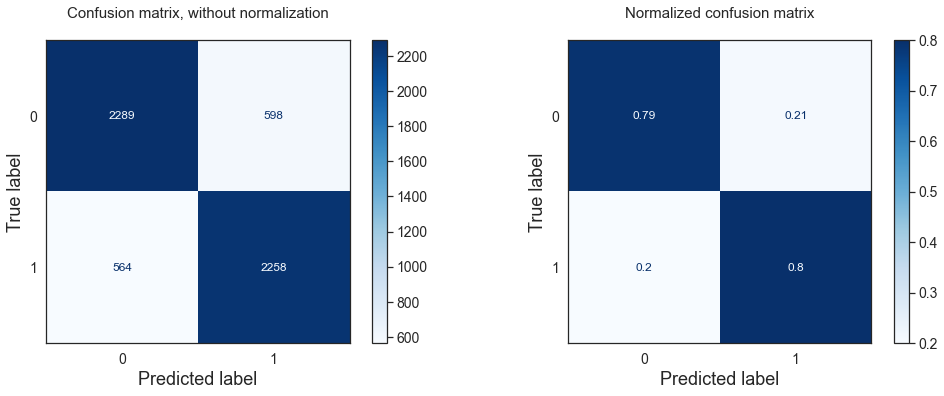

In [66]:
from sklearn.metrics import plot_confusion_matrix

f,(ax1,ax2) = plt.subplots(1,2,figsize=(15,6))

cm1 = plot_confusion_matrix(rf, x_test, y_test, cmap=plt.cm.Blues,normalize=None,ax=ax1)
cm1.ax_.set_title("Confusion matrix, without normalization\n",fontsize=15)

cm2 = plot_confusion_matrix(rf, x_test, y_test, cmap=plt.cm.Blues,normalize="true",ax=ax2)
cm2.ax_.set_title("Normalized confusion matrix\n",fontsize=15)
plt.tight_layout(pad=3)

plt.show()

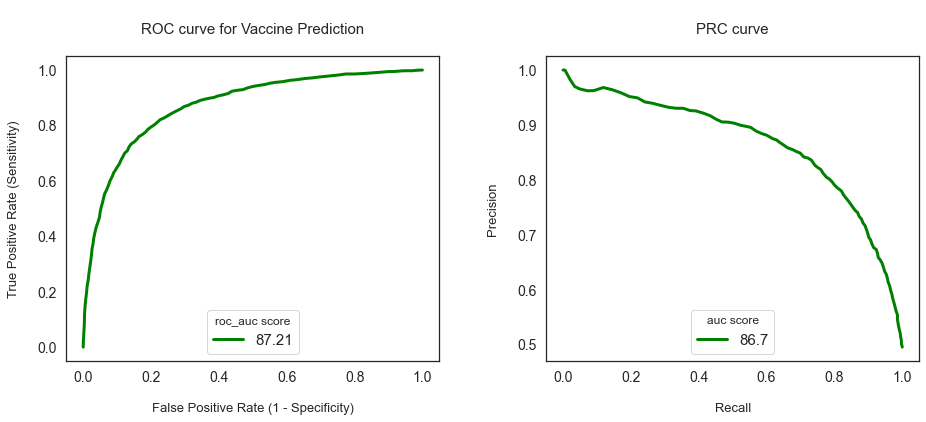

In [67]:
from sklearn.metrics import roc_curve, roc_auc_score,precision_recall_curve,auc
sns.set(rc={"font.size":12,"axes.titlesize":18,"axes.labelsize":18,"xtick.labelsize":14,"ytick.labelsize":14,
            "legend.fontsize":12,'axes.grid' : False,'axes.facecolor': 'w','axes.edgecolor':"0.15"})
plt.figure(figsize=(14,7))
plt.subplot(1,2,1)
y_predict = rf.predict_proba(x_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test,y_predict)
plt.title('\nROC curve for Vaccine Prediction\n',fontsize=15)
plt.xlabel('\nFalse Positive Rate (1 - Specificity)',fontsize=13)
plt.ylabel('True Positive Rate (Sensitivity)\n',fontsize=13)
plt.plot(fpr, tpr,color='green',lw=3)
plt.legend(labels=[round(roc_auc_score(y_test,y_predict)*100,2)],loc=8,fontsize=15,title="roc_auc score")

plt.subplot(1,2,2)
precision, recall, thresholds = precision_recall_curve(y_test, y_predict)
plt.plot(recall, precision,color='green',lw=3)
plt.xlabel('\nRecall',fontsize=13)
plt.ylabel('Precision\n',fontsize=13)
plt.title('\nPRC curve\n',fontsize=15)
plt.legend(labels=[round(auc(recall, precision)*100,2)],loc=8,fontsize=15,title="auc score")
plt.tight_layout(pad=4)
plt.show()



## Hyperparameter Tuning

In [ ]:
import optuna

def objective(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 2000,),
        'max_depth': int(trial.suggest_float('max_depth', 10, 100,)),
        'min_samples_split': trial.suggest_int('min_sample_split', 2, 20),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 20),
        'max_features': trial.suggest_categorical('max_features',["auto", "sqrt", "log2"]),
        'bootstrap':trial.suggest_categorical('bootstrap',[True,False]),
        'random_state': trial.suggest_int('random_state',0,100)
        #'scale_pos_weight': 0.48,
       }
        
    clf = RandomForestClassifier(**params)
    auccuracies = []
    X_train_k = x_train.values
    y_train_k = y_train.values
    kf = KFold(n_splits=3,random_state=2000,shuffle=True)
    for train_idx, valid_idx in kf.split(X_train_k,y_train_k):
        train_data = X_train_k[train_idx, :], y_train_k[train_idx]
        valid_data = X_train_k[valid_idx, :], y_train_k[valid_idx]
        
        clf.fit(X_train_k[train_idx, :], y_train_k[train_idx])
        pred = clf.predict(X_train_k[valid_idx, :])
        accuracy = accuracy_score(y_train_k[valid_idx],pred)
        auccuracies.append(accuracy)
    print(f'Trial done: Accuracy values on folds: {auccuracies}')
    return np.average(auccuracies)

from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

n_trials = 51

FIT_Rf = True

if FIT_Rf:
    study = optuna.create_study(direction="maximize")
    study.optimize(objective, n_trials=n_trials)

    print("Number of finished trials: {}".format(len(study.trials)))

    print("Best trial:")
    trial = study.best_trial

    print("  Value: {}".format(trial.value))

    print("  Params: ")
    for key, value in trial.params.items():
        print("    {}: {}".format(key, value))

## ML trainning

In [68]:
from sklearn.ensemble import RandomForestClassifier
rf2 = RandomForestClassifier(n_estimators= 1460,
    max_depth= 50.21204162022319,
    min_samples_split= 2,
    min_samples_leaf= 1,
    max_features='log2',
    bootstrap= False,
    random_state=27)
rf2.fit(x_train,y_train)
y_predict1 = rf2.predict(x_test)
y_train.value_counts()

seasonal_vaccine
1                   11450
0                   11385
dtype: int64

## Evaluation of Machine learning model

In [69]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,log_loss,auc
print(f"\033[1mAccuracy score : {round(accuracy_score(y_test,y_predict1)*100,2)} %\n")
print(f"Log loss : {round(log_loss(y_test,y_predict1),2)} %\n")
print("Classification Report\n")
print(classification_report(y_test,y_predict1))


Accuracy score : 79.98 %

Log loss : 6.92 %

Classification Report

              precision    recall  f1-score   support

           0       0.80      0.80      0.80      2887
           1       0.80      0.80      0.80      2822

    accuracy                           0.80      5709
   macro avg       0.80      0.80      0.80      5709
weighted avg       0.80      0.80      0.80      5709



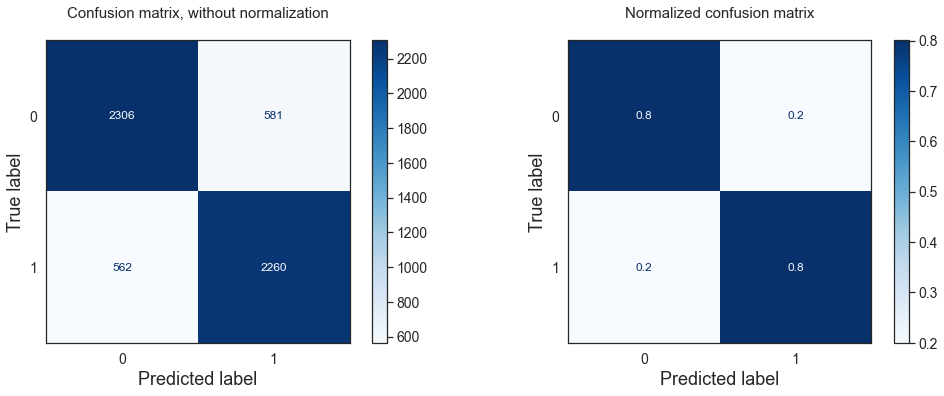

In [70]:
from sklearn.metrics import plot_confusion_matrix

f,(ax1,ax2) = plt.subplots(1,2,figsize=(15,6))

cm1 = plot_confusion_matrix(rf2, x_test, y_test, cmap=plt.cm.Blues,normalize=None,ax=ax1)
cm1.ax_.set_title("Confusion matrix, without normalization\n",fontsize=15)

cm2 = plot_confusion_matrix(rf2, x_test, y_test, cmap=plt.cm.Blues,normalize="true",ax=ax2)
cm2.ax_.set_title("Normalized confusion matrix\n",fontsize=15)
plt.tight_layout(pad=3)

plt.show()

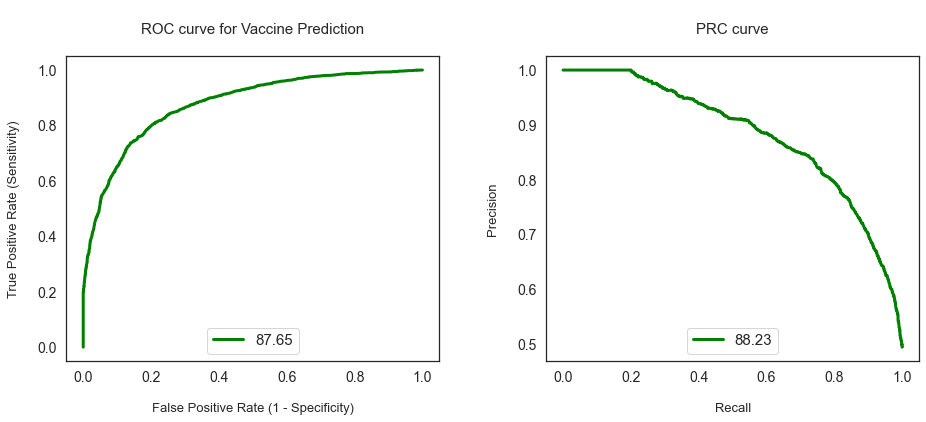

In [71]:
from sklearn.metrics import roc_curve, roc_auc_score,precision_recall_curve,auc
plt.figure(figsize=(14,7))
plt.subplot(1,2,1)
y_predict1 = rf2.predict_proba(x_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test,y_predict1)
plt.title('\nROC curve for Vaccine Prediction\n',fontsize=15)
plt.xlabel('\nFalse Positive Rate (1 - Specificity)',fontsize=13)
plt.ylabel('True Positive Rate (Sensitivity)\n',fontsize=13)
plt.plot(fpr, tpr,color='green',lw=3)
plt.legend(labels=[round(roc_auc_score(y_test,y_predict1)*100,2)],loc=8,fontsize=15)



plt.subplot(1,2,2)
precision, recall, thresholds = precision_recall_curve(y_test, y_predict1)
plt.plot(recall, precision,color='green',lw=3)
plt.xlabel('\nRecall',fontsize=13)
plt.ylabel('Precision\n',fontsize=13)
plt.title('\nPRC curve\n',fontsize=15)
plt.legend(labels=[round(auc(recall, precision)*100,2)],loc=8,fontsize=15)
plt.tight_layout(pad=4)
plt.show()



## ML trainning 

In [72]:
from sklearn.ensemble import ExtraTreesClassifier  

ec = ExtraTreesClassifier()
ec.fit(x_train,y_train)
y_predict2 = ec.predict(x_test)
y_train.value_counts()

seasonal_vaccine
1                   11450
0                   11385
dtype: int64

## Evaluation of Machine learning model

In [73]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,log_loss,auc
print(f"\033[1mAccuracy score : {round(accuracy_score(y_test,y_predict2)*100,2)} %\n")
print(f"Log loss : {round(log_loss(y_test,y_predict2),2)} %\n")
print("Classification Report\n")
print(classification_report(y_test,y_predict2))

Accuracy score : 79.82 %

Log loss : 6.97 %

Classification Report

              precision    recall  f1-score   support

           0       0.80      0.80      0.80      2887
           1       0.80      0.79      0.80      2822

    accuracy                           0.80      5709
   macro avg       0.80      0.80      0.80      5709
weighted avg       0.80      0.80      0.80      5709



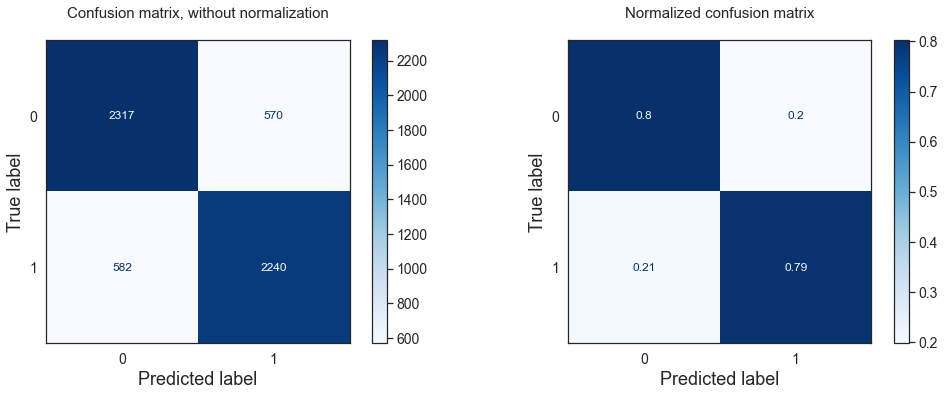

In [74]:
from sklearn.metrics import plot_confusion_matrix

f,(ax1,ax2) = plt.subplots(1,2,figsize=(15,6))

cm1 = plot_confusion_matrix(ec, x_test, y_test, cmap=plt.cm.Blues,normalize=None,ax=ax1)
cm1.ax_.set_title("Confusion matrix, without normalization\n",fontsize=15)

cm2 = plot_confusion_matrix(ec, x_test, y_test, cmap=plt.cm.Blues,normalize="true",ax=ax2)
cm2.ax_.set_title("Normalized confusion matrix\n",fontsize=15)
plt.tight_layout(pad=3)

plt.show()

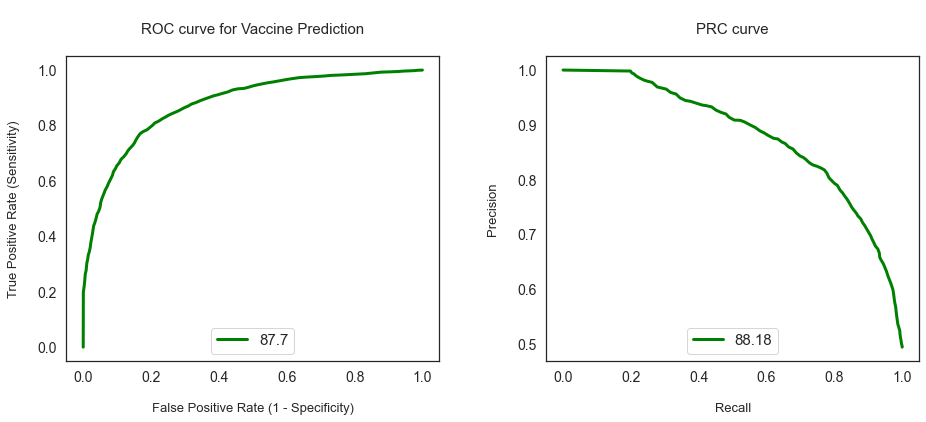

In [75]:
from sklearn.metrics import roc_curve, roc_auc_score,precision_recall_curve,auc
plt.figure(figsize=(14,7))
plt.subplot(1,2,1)
y_predict2 = ec.predict_proba(x_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test,y_predict2)
plt.title('\nROC curve for Vaccine Prediction\n',fontsize=15)
plt.xlabel('\nFalse Positive Rate (1 - Specificity)',fontsize=13)
plt.ylabel('True Positive Rate (Sensitivity)\n',fontsize=13)
plt.plot(fpr, tpr,color='green',lw=3)
plt.legend(labels=[round(roc_auc_score(y_test,y_predict2)*100,2)],loc=8,fontsize=15)

plt.subplot(1,2,2)
precision, recall, thresholds = precision_recall_curve(y_test, y_predict2)
plt.plot(recall, precision,color='green',lw=3)
plt.xlabel('\nRecall',fontsize=13)
plt.ylabel('Precision\n',fontsize=13)
plt.title('\nPRC curve\n',fontsize=15)
plt.legend(labels=[round(auc(recall, precision)*100,2)],loc=8,fontsize=15)
plt.tight_layout(pad=4)
plt.show()

## Hyperparameter Tunning

In [ ]:
import optuna

def objective(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 2000),
        #'max_depth': int(trial.suggest_float('max_depth', 10, 100, log=True)),
        'min_samples_split': trial.suggest_int('min_sample_split', 2, 6),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 6,),
        'max_features': trial.suggest_categorical('max_features',["auto", "sqrt", "log2"]),
        'bootstrap':trial.suggest_categorical('bootstrap',[True,False]),
        'random_state': trial.suggest_int('random_state', 0, 100)
        #'scale_pos_weight': 0.48,
       }
        
    clf = ExtraTreesClassifier(**params)
    auccuracies = []
    X_train_k = x_train.values
    y_train_k = y_train.values
    kf = KFold(n_splits=3,random_state=None,shuffle=True)
    for train_idx, valid_idx in kf.split(X_train_k,y_train_k):
        train_data = X_train_k[train_idx, :], y_train_k[train_idx]
        valid_data = X_train_k[valid_idx, :], y_train_k[valid_idx]
        
        clf.fit(X_train_k[train_idx, :], y_train_k[train_idx])
        pred = clf.predict(X_train_k[valid_idx, :])
        accuracy = accuracy_score(y_train_k[valid_idx],pred)
        auccuracies.append(accuracy)
    print(f'Trial done: Accuracy values on folds: {auccuracies}')
    return np.average(auccuracies)

from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

n_trials = 51

#FIT_XGB = True

#if FIT_XGB:
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=n_trials)

print("Number of finished trials: {}".format(len(study.trials)))

print("Best trial:")
trial = study.best_trial

print("  Value: {}".format(trial.value))

print("  Params: ")
for key, value in trial.params.items():
  print("    {}: {}".format(key, value))

## After Hyperparameter Tuning Ml trainning

In [76]:
from sklearn.ensemble import ExtraTreesClassifier  

ec1 = ExtraTreesClassifier(
    n_estimators= 1611,
    max_depth= None,
    min_samples_split=2,
    min_samples_leaf= 1,
    max_features= 'sqrt',
    max_leaf_nodes= None,
    bootstrap= False,
    random_state=44)
ec1.fit(x_train,y_train)
y_predict3 = ec1.predict(x_test)
y_train.value_counts()

seasonal_vaccine
1                   11450
0                   11385
dtype: int64

## Evaluation of Machine learning model

In [77]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,log_loss,auc
print(f"\033[1mAccuracy score : {round(accuracy_score(y_test,y_predict3)*100,2)} %\n")
print(f"Log loss : {round(log_loss(y_test,y_predict3),2)} %\n")
print("Classification Report\n")
print(classification_report(y_test,y_predict3))


Accuracy score : 79.98 %

Log loss : 6.92 %

Classification Report

              precision    recall  f1-score   support

           0       0.80      0.80      0.80      2887
           1       0.80      0.80      0.80      2822

    accuracy                           0.80      5709
   macro avg       0.80      0.80      0.80      5709
weighted avg       0.80      0.80      0.80      5709



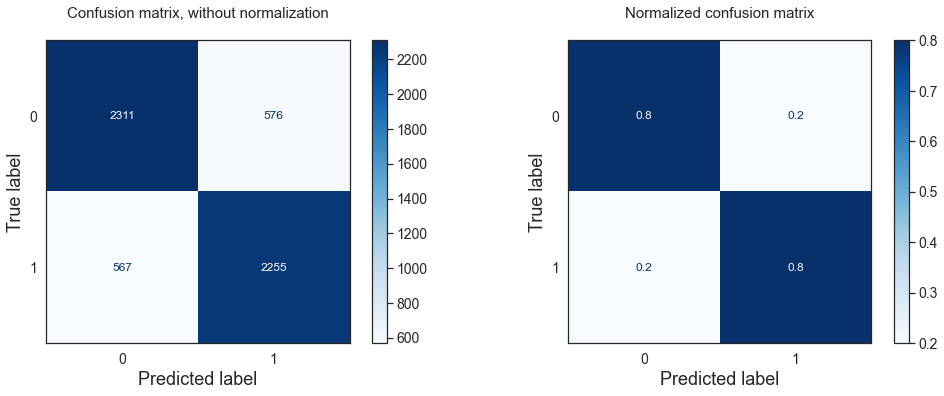

In [78]:
from sklearn.metrics import plot_confusion_matrix

f,(ax1,ax2) = plt.subplots(1,2,figsize=(15,6))

cm1 = plot_confusion_matrix(ec1, x_test, y_test, cmap=plt.cm.Blues,normalize=None,ax=ax1)
cm1.ax_.set_title("Confusion matrix, without normalization\n",fontsize=15)

cm2 = plot_confusion_matrix(ec1, x_test, y_test, cmap=plt.cm.Blues,normalize="true",ax=ax2)
cm2.ax_.set_title("Normalized confusion matrix\n",fontsize=15)
plt.tight_layout(pad=3)

plt.show()

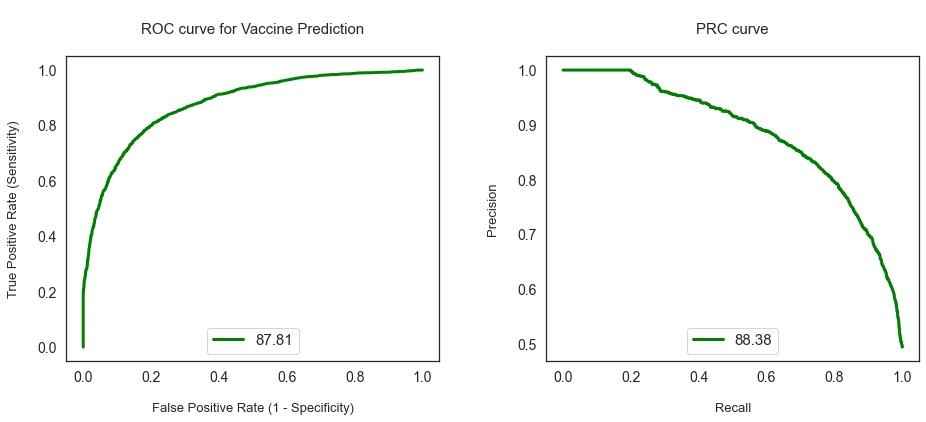

In [79]:
from sklearn.metrics import roc_curve, roc_auc_score,precision_recall_curve,auc
plt.figure(figsize=(14,7))
plt.subplot(1,2,1)
y_predict3 = ec1.predict_proba(x_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test,y_predict3)
plt.title('\nROC curve for Vaccine Prediction\n',fontsize=15)
plt.xlabel('\nFalse Positive Rate (1 - Specificity)',fontsize=13)
plt.ylabel('True Positive Rate (Sensitivity)\n',fontsize=13)
plt.plot(fpr, tpr,color='green',lw=3)
plt.legend(labels=[round(roc_auc_score(y_test,y_predict3)*100,2)],loc=8,fontsize=15)

plt.subplot(1,2,2)
precision, recall, thresholds = precision_recall_curve(y_test, y_predict3)
plt.plot(recall, precision,color='green',lw=3)
plt.xlabel('\nRecall',fontsize=13)
plt.ylabel('Precision\n',fontsize=13)
plt.title('\nPRC curve\n',fontsize=15)
plt.legend(labels=[round(auc(recall, precision)*100,2)],loc=8,fontsize=15)
plt.tight_layout(pad=4)
plt.show()